<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/03_StatisticsUsingPython/blob/main/03_HypothesisTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Using Python: Hypothesis test

In this course, we will learn more about what are and how to do hypothesis tests. First, we will learn how to do normality tests and how to evaluate and use the p-value. Then, we will get to know the steps of a good test, and use the t-student distribution and the chi squared to assist us in this task. Finally, we will apply the Hypothesis test to prove some of our hypothesis.

In this project, we will use a dataset from PNAD 2015. First, let's import this data using:

In [3]:
import pandas as pd

dataset = pd.read_csv('dados.csv')

dataset.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In this dataset, we have information regarding:

*   State from Brazil (UF)
*   Sex (Sexo)
*   Age (Idade)
*   Color (Cor)
*   Years of study (Anos de estudo)
*   Monthly income (Renda)
*   Height (Altura)

For some of these, our data is encoded. The code can be seen in the following:


**State from Brazil:**

In [4]:
map_state = {11: "Rondônia",
             12: "Acre",
             13: "Amazonas",
             14: "Roraima",
             15: "Pará",
             16: "Amapá",
             17: "Tocantins",
             21: "Maranhão",
             22: "Piauí",
             23: "Ceará",
             24: "Rio Grande do Norte",
             25: "Paraíba",
             26: "Pernambuco",
             27: "Alagoas",
             28: "Sergipe",
             29: "Bahia",
             31: "Minas Gerais",
             32: "Espírito Santo",
             33: "Rio de Janeiro",
             35: "São Paulo",
             41: "Paraná",
             42: "Santa Catarina",
             43: "Rio Grande do Sul",
             50: "Mato Grosso do Sul",
             51: "Mato Grosso",
             52: "Goiás",
             53: "Distrito Federal"}

**Sex:**

In [5]:
map_sex = {0: "M",
           1: "F"}

**Years of study:**

In [6]:
map_years_study = {1 : "0 years",
                   2 : "1 year",
                   3 : "2 years",
                   4 : "3 years",
                   5 : "4 years",
                   6 : "5 years",
                   7 : "6 years",
                   8 : "7 years",
                   9 : "8 years",
                   10: "9 years",
                   11: "10 years",
                   12: "11 years",
                   13: "12 years",
                   14: "13 years",
                   15: "14 years",
                   16: "15 years",
                   17: "Not found",
                   18: "Not aplicable"}

**Color:**

In [7]:
map_color = {0: "Indigenous",
             2: "White",
             4: "Black",
             6: "Yellow",
             8: "Pardo",
             9: "Not declared"}

This dataset can be found from IBGE website. However, some data treatment was performed before:


*   Invalid entries for monthly income were eliminated (999 999 999 999).
*   Missing entries for monthly income were eliminated.
*   We considered only data from a person of reference in each house.


# Normality test

A normality test can be employed to check if a given variable (or feature) was drawn from a Normal distribution. 

To do a normality test, we can use the library scipy:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [8]:
from scipy.stats import normaltest

significance = 0.05

Let's test if the variable related to monthly income in our dataset is given by a Normal distribution. Here, we will consider only those incomes lower than R$ 10,000.00.

In [9]:
income = dataset.query('Renda < 10000')['Renda']

Let's see the histogram for this variable:

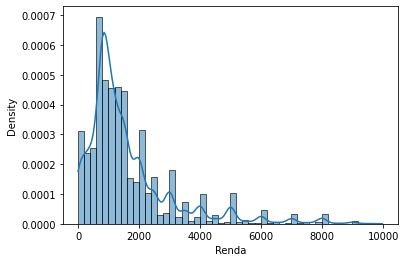

In [10]:
import seaborn as sns

sns.histplot(income, bins = 50, stat = "density", kde = True)

We see that, in this case, our histogram does not resembles the bell-shaped Normal curve. However, we can use a formal test to check for its normality.

The function *normaltest( )* tests the null hypothesis $H_0$ that the sample comes from a Normal distribution.

In [11]:
normaltest(income)

NormaltestResult(statistic=32246.864442817496, pvalue=0.0)

Ok, our test showed as two values. How can we interpret this?

Considering a significance level of 5%, if $p < 0.05$, we reject the null hypothesis. Thus, since $p \approx 0.0$, we do reject the null hypothesis. Thus, **observations for monthly income do not come from a Normal distribution**.

Let's now test another variable: height.

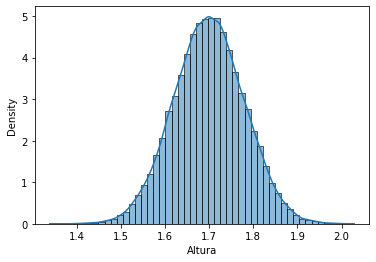

In [12]:
height = dataset.Altura
sns.histplot(height, bins = 50, stat = "density", kde = True)

Now, our variable actually looks a lot like a bell-shaped curve! But let's try to use our normality test.

In [13]:
normaltest(height)

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

Now, our $p > 0.05$, which was our significance level. This time, we **do not** reject the null hypothesis. Thus, we can say that **the height may come from a Normal distribution**.

## Phases of a test

Ok, now that we showed an example of a statistical test and understood what information it is giving us, let's slowly build our knowledge. First, let's discuss what are the phases of a test.

**1. Formulation of the hypothesis**

First, we will formulate our null hypothesis $H_0$ and our alternative hypothesis $H_1$. Some important points:

*   In general, the goal of the study should be formulated as the alternative hypothesis.
*   The null hypothesis always says an equality or populational property, and the alternative hypothesis is the inequality that denies $H_0$.
*   The $H_0$ and $H_1$ are always complementary to each other.

**2. Choosing an adequate sampling distribution**

Then, we have to choose an adequate distribution. Usually, this distribution is the Normal distribution, but, in some cases, other distributions might be more adequate. Some important points:

* When the sample size is higher than 30, the Normal is almost always preferred (due to the Central Tendency Theorem).
* When the sample size is lower than 30, if we think that the distribution is very close to a Normal, and the population standard deviation is known, we can still use the Normal.
* When the sample size is lower than 30, if we think that the distribution is very close to a Normal, and the population standard deviation is unknown, we should use the t-Student distribution.

**3. Choosing the test significance**

Here, we will choose the test significance level ($\alpha$). Usually, this comes from intuition and experience. Some important points:

*   The confidence level ($1 - \alpha$) represents the probability of hitting an estimate, while the significance level ($\alpha$) represents the probability of missing this estimate.
*   Tests can be one-tailed, when $H_1$ has a sign > or <, or two-tailed, when $H_1$ has a sign $\neq$. 

**4. Evaluate the test statistics**

Now, we perform the test and verify the aceptance and rejection areas of this test. 

* In this step we obtain sample statistics required to the test execution (mean, standard deviation, degrees of freedom, and others).

**5. Accept or reject the null hypothesis**

According to a rule of decision, we will accept or reject the null hypothesis. 

* If the interval contains the test statistics, we accept $H_0$ and reject $H_1$.
* If the interval does not contain the test statistics, we reject $H_0$ and accept $H_1$.
* Usually, it is easier to verify this using the p-value. If $p > \alpha$, then we accept the null hypothesis.

# Parametric tests

First, we will study parametric tests. These tests make some premises over the distribution of the population parameters. We will first discuss two-tailed tests.

## Two-tailed tests

A two-tailed test is the one where the null hypothesis is formulated using a $=$ sign. Let's see an example:

**A juice company works with packages of 500 ml. The process of production is fully automatized. To guarantee that packages have the right amount, the company has a quality control department. This department takes 50 packages, and makes a hypothesis test, considering a significance level of 5%. If the mean amount of juice in each package was 503.24 ml, is this difference high enough for us to reject the hypothesis that the mean value is 500 ml?**

In [14]:
sample = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
          501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
          497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
          503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
          502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [15]:
sample_df = pd.DataFrame(sample, columns = ['Sample'])

First, let's evaluate some estimates for our sample.

In [16]:
mean_s = sample_df.mean( )
mean_s

Sample    503.24
dtype: float64

In [17]:
std_s = sample_df.std( )
std_s

Sample    4.483803
dtype: float64

Now, let's define some important values for our test:

In [18]:
desired_mean = 500
significance = 0.05
confidence = 1 - significance
n = 50

Now, let's define our hypothesis. Here, we want to check if the population mean **is equal to** 500 ml. Thus, our hypotheses are:

\begin{equation}
H_0 : \mu = 500
\end{equation}

\begin{equation}
H_1 : \mu \neq 500
\end{equation}

Note that, in the case, we can define an acceptance area for our null hypothesis:

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

Note that, here, our curve is two-tailed, as we will reject the null hypothesis if the test statistics is too high or too low.

First, let's get the z-score for our significance level:



In [19]:
from scipy.stats import norm

z_alpha = norm.ppf(1 - significance/2)
z_alpha

1.959963984540054

For a test on the difference of means, the test statistics is given by:

\begin{equation}
z=\frac{\bar{x}-\mu_{0}}{\frac{s}{\sqrt{n}}}
\end{equation}

Thus, let's evaluate the test statistics:

In [20]:
import numpy as np

z = (mean_s - desired_mean)/(std_s/np.sqrt(n))
z

Sample    5.10956
dtype: float64

Note that the test statistics is 5.11, which is higher than the z-score for the significance level. Thus, the z-score is outside of the acceptance area:

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

Thus, we will **reject the null hypothesis**. This means that, with a confidence of 95%, we can say that the mean from the population is actually different from the desired mean.

### The p-value criterion

Using the test statistics, we can define whether we should accept or reject the null hypothesis. However, there are also another manners of doing so. The most popular one is actually evaluating the p-value. The p-value is related to the **probability of finding a sample with a given test statistics**. After evaluating it, we can compare it with the test significance:

*   If the p-value is higher than the test significance, we accept the null hypothesis.
*   If the p-value is lower than the test significance, we reject the null hypothesis.

Let's remember: our test significance is:

In [21]:
significance

0.05

Then, we can evaluate the p-value using:

In [22]:
p_value = 2*(1 - norm.cdf(abs(z)))
p_value

array([3.22910317e-07])

Let's understand this equation:

*   **norm.cdf(z)** gives the area to the left of the z-score (probability of being less than $z$).
*   Since we want the area to the right (more than $z$), we do **1 - norm.cdf(z)**.
*   Then, since we area working with a two-tailed test, we multiply by 2.

So, our p-value is $3.23 \times 10^{-7}$, which is lower than the significance level. Thus, we reject the null hypothesis.



Now, using statsmodels, we have a much easier way of performing all of this:

In [23]:
from statsmodels.stats.weightstats import ztest

ztest(x1 = sample_df, value = desired_mean)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([5.10955978]), array([3.22910317e-07]))

The function *ztest( )* returns the test-statistics and the p-value, and they match with those we evaluated before. Nice!

Another test we can do is:

In [24]:
from statsmodels.stats.weightstats import DescrStatsW

test = DescrStatsW(sample_df)

test.ztest_mean(value = desired_mean)

(array([5.10955978]), array([3.22910317e-07]))

Nice! The *DescrStatsW( )* method can also be used to make many other tests, and is a very strong tool from statsmodels. **Also, note that these built-in functions assume a two-tailed test by default!** 

## One-tailed tests

On one-tailed tests, the null hypothesis presents an inequality. Let's see an example:

**A famous soda brand say that one can of soda has a maximum of 37 g of sugar. The quality control department checks this with a sample of 25 cans of soda. Considering that the population distribution is close to a Normal and considering a significance level of 5%, is it possible to accept the brand allegation?**

Note that, here, we have 25 samples. Thus, since the population distribution is close to a Normal and we have less than 30 samples, we should consider the **t-Student distribution**.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

The t-Student distribution is very close to a Normal. However, its tails are larger. The t-student distribution is also defined by the number of degrees of freedom, which is equal to $n - 1$, where $n$ is the number of samples.

In [25]:
sample = [37.27, 36.42, 34.84, 34.60, 37.49,
          36.53, 35.49, 36.90, 34.52, 37.30,
          34.99, 36.55, 36.29, 36.06, 37.42,
          34.47, 36.70, 35.86, 36.80, 36.92,
          37.04, 36.39, 37.32, 36.64, 35.45]

In [26]:
sample_df = pd.DataFrame(sample, columns = ['Sample'])

Let's evaluate our estimates:

In [27]:
mean_s = sample_df.mean( )
mean_s

Sample    36.2504
dtype: float64

In [28]:
std_s = sample_df.std( )
std_s

Sample    0.966754
dtype: float64

Now, let's define our null and alternative hypothesis. We want to check if the mass of sugar in each can of soda can be higher than 37 g (with a confidence level of 95%). Thus:

\begin{equation}
H_0 : \mu \leq 37.0
\end{equation}

\begin{equation}
H_1 : \mu > 37.0
\end{equation}

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

Note that, since our alternative hypothesis is of type >, we will check if our test-statistics is higher than a given z-score, related to the test significance. 

Since we will use the t-Student distribution, we will actually use a t-score:

In [29]:
from scipy.stats import t as t_student

n = 25
confidence = 0.95
dof = n - 1

t_alpha = t_student.ppf(confidence, dof)
t_alpha

1.7108820799094275

Now, let's evaluate the test statistics using:

\begin{equation}
t=\frac{\bar{x}-\mu_{0}}{\frac{s}{\sqrt{n}}}
\end{equation}

In [30]:
desired_mean = 37

t = (mean_s - desired_mean)/(std_s/np.sqrt(n))
t

Sample   -3.876893
dtype: float64

So, since we are dealing with a $H_1$ with >, we accept the null hypothesis when $t$ be lower than $t_{\alpha}$, which is true:

In [31]:
t <= t_alpha

Sample    True
dtype: bool

Now, let's apply the p-value:

In [32]:
pvalue = 1 - t_student.cdf(t, dof)

pvalue

array([0.99964062])

Now, since we are working with a one-tailed test, we do not have to multiply it by 2.0. Since the p-value is higher than the significance, we accept the null hypothesis!

We can also do the same thing using *DescrStatsW*:

In [33]:
from statsmodels.stats.weightstats import DescrStatsW

test = DescrStatsW(sample_df)

test.ttest_mean(value = desired_mean, alternative = "larger")

(array([-3.87689312]), array([0.99964062]), 24.0)

Here, note that we used *alternative = "larger"* because we are working with a one-tailed test where $H_1 : \mu > 37.0$. Also, note that the test statistics and the p-value are also the same as the ones we evaluated.

\begin{equation}
z=\frac{\bar{x}-\mu_{0}}{\frac{s}{\sqrt{n}}}
\end{equation}

## Tests for two samples

When we have two samples, we can do tests comparing both of these samples. For instance, we can check if their means are the same, or if they come from the same distribution. Let's see an example:

**On our dataset, we have information about sex and monthly income. Using random samples (each with 500 observations), prove that the monthly income for women is lower than the monthly income for men, considering a significance level of 1%.**

So, first, let's define our samples:

In [34]:
men = dataset.query("Sexo == 0")
sample_m = men.sample(500, random_state = 101).Renda

women = dataset.query("Sexo == 1")
sample_f = women.sample(500, random_state = 101).Renda

So, first, let's evaluate the mean of each sample:

In [35]:
mean_m = sample_m.mean( )

In [36]:
mean_f = sample_f.mean( )

So, while men make, on average, R\$ 2,462.19, women make, on average, R\$ 1,525.57. However, is this difference enough for us to say that the population mean is different?

Let's also calculate the standard deviation of each group and define some parameters of our test:

In [37]:
std_m = sample_m.std( )
std_f = sample_f.std( )

significance = 0.01
confidence = 1 - significance
n_m = 500
n_f = 500

D_0 = 0 # Difference between means. First, we will assume that there is no difference 
        # between means (we are testing if the incomes are the same).

So, let's formulate our hypotheses:

\begin{equation}
H_0 : \mu_1 - \mu_2 \leq 0.0
\end{equation}

\begin{equation}
H_1 : \mu_1 - \mu_2 > 0.0
\end{equation}
where $\mu_1$ is the mean income for men, and $\mu_2$ is the mean income for women. Thus, if the null hypothesis is rejected, it means that men indeed make more money than women. It is important to remember that, here, we are considering a significance level of 1%.

Since we have more than 30 samples, we will use the z-score from the Normal distribution to perform our test. 

**Note that, for the t-Student distribution, when we make tests that use two samples, the number of degrees of freedom is $n_1 + n_2 - 2$.**

So, let's get the threshold z-score. Since we have a one-tailed test, we do:

In [38]:
z_alpha = norm.ppf(1 - significance)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

Now, let's evaluate the test statistics. For the difference of means, that is given by:

\begin{equation}
z=\frac{\left(\overline{x_{1}}-\overline{x_{2}}\right)-D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}
\end{equation}

Thus, let's evaluate it:

In [39]:
z = ((mean_m - mean_f) - D_0)/np.sqrt((std_m*std_m/n_m) + (std_f*std_f/n_f))
z

5.86562005776475

So, since our test-statistics was higher than our threshold ($z_\alpha \approx 2.33$), we reject the null hypothesis. Thus, the monthly income for women is indeed lower than for men.

We can evaluate the p-value using:

In [40]:
p_value = 1 - norm.cdf(z)
p_value

2.237286800266247e-09

Which is lower than the test significance, thus rejecting the null hypothesis (once again).

We can also perform tests comparing means using built-in functions from statsmodels:

In [41]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

test_m = DescrStatsW(sample_m)
test_f = DescrStatsW(sample_f)

In [42]:
test = CompareMeans(test_m, test_f)

In [43]:
test.ztest_ind(alternative = "larger", value = D_0)

(5.865620057764754, 2.2372867859458255e-09)

Great! Again, we found the same test-statistics and the same p-value.

We can also simply use the *CompareMeans( )* function:

# Non-parametric tests

When we our distribution does not follow a Normal, or if we do not have sufficient elements to think that it follows a Normal (usually due do a very low number of sampling points), we can't validate the CLT. In these cases, we have to use non-parametric tests, which make no assumptions over the distribution of our data.

Let's see an example:

**Before each match of a championship, the coin used by a referee is tested. The referee throws the coin 50 times, and, in 33 times, it says heads. Considering a significance level of 5%, is it possible to say that the coin is not honest?**

We can solve this using the Chi-squared test.

## Chi-squared test ($\chi^2$)

The chi-squared test checks if there is **no difference between the observed frequencies and the expected frequencies**. 


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

So, if our test statistics is higher than $\chi^2_p$, we reject the null hypothesis. So, let's try to solve our coin problem using the chi-squared test.

In our coin testing, there are two possible events: heads or tails ($k = 2$). We expect that a coin thrown 50 times shows 25 heads and 25 tails. However, our coin showed heads 33 times. Also, we will consider a significance level of 5%. Let's store this data:

In [44]:
F_o = [33, 17]
F_e = [25, 25]

significance = 0.05
confidence = 1 - significance
k = 2
dof = k - 1

So, let's formulate our hypotheses:

\begin{equation}
H_0 : F_{heads} = F_{tails}
\end{equation}

\begin{equation}
H_1 : F_{heads} \neq F_{tails}
\end{equation}

Now, let's do our test:

In [45]:
from scipy.stats import chi

chi_2_alpha = chi.ppf(confidence, dof)**2
chi_2_alpha

3.8414588206941245

The test statistics for the chi-squared test is given by:

\begin{equation}
\chi^{2}=\sum_{i=1}^{k} \frac{\left(F_{i}^{O b s}-F_{i}^{E s p}\right)^{2}}{F_{i}^{E s p}}
\end{equation}

Thus, let's evaluate it:

In [46]:
chi_2 = 0

for i in range(k):
  chi_2 = chi_2 + (F_o[i] - F_e[i])**2/F_e[i] 

chi_2

5.12

So, since our $\chi^2$ is higher than our threshold for $\alpha = 0.95$ (where $\chi^2_\alpha \approx 3.84$, we reject our null hypothesis! The coin is not honest. 

The p-value can be evaluated by:

In [47]:
p_value = 1 - chi.cdf(np.sqrt(chi_2), dof)
p_value

0.023651616655355978

So, our p_value is lower than our significance. Again, this means that we should reject our null hypothesis.

We can also do the hypothesis test using built-in function from scipy.stats:

In [48]:
from scipy.stats import chisquare

chisquare(f_obs = F_o, f_exp = F_e)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

## Wilcoxon test

The Wilcoxon test can be used to compare two samples. It can be employed to test the difference between two conditions, that is, when the same element is subjected to two measures. Let's see an example.

**A new treatment for smoke addiction is being tested in 35 volunteers. The number of cigarettes used in a day before and after the treatment were collected. Assuming a confidence level of 95%, is it possible to say that the new treatment was effective?**

In [49]:
before = [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49]
after = [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]

smoke = {'Before' : before,
         'After'  : after}

smoke_df = pd.DataFrame(smoke)
smoke_df.head( )

,Before,After
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [50]:
mean_bef = smoke_df['Before'].mean( )
mean_bef

31.857142857142858

In [51]:
mean_aft = smoke_df['After'].mean( )
mean_aft

11.2

Now, let's define our hypotheses:

\begin{equation}
H_0 : \text{There is no difference between the groups ($\mu_1 = \mu_2$).}
\end{equation}

\begin{equation}
H_1 : \text{There is a difference between the groups ($\mu_1 \neq \mu_2$).}
\end{equation}

On the Wilcoxon test, theses are always the chosen hypotheses. The means that the Wilcoxon test is always two-tailed. 

The Wilcoxon test uses a distribution because its test statistics is close to a Normal distribution (closer as $n$ increases). Thus, since $n > 20$, we will use the Normal distribution. If $n < 20$, we would use the t-Student distribution. 

Now, let's define some parameters of our test:

In [52]:
significance = 0.05
confidence = 1 - significance
n = smoke_df['Before'].count( ) 
z_alpha = norm.ppf(1 - significance/2)
z_alpha

1.959963984540054

Now, let's evaluate the test statistics:

\begin{equation}
Z=\frac{T-\mu_{T}}{\sigma_{T}}
\end{equation}

where:

\begin{equation}
\mu_{T}=\frac{n(n+1)}{4}
\end{equation}

\begin{equation}
\sigma_{T}=\sqrt{\frac{n(n+1)(2 n+1)}{24}}
\end{equation}

So, let's apply the Wilcoxon test. First, let's evaluate $T$:

In [53]:
smoke_df['Diff'] = smoke_df.After - smoke_df.Before
smoke_df['|Diff|'] = smoke_df.Diff.abs( )

smoke_df.head( )

,Before,After,Diff,|Diff|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1


Now, let's sort the values according to the absolute difference:

In [54]:
smoke_df.sort_values('|Diff|', inplace = True)
smoke_df

,Before,After,Diff,|Diff|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


Now, let's create a new column, which will define the rank of each pair:

In [55]:
smoke_df['Rank'] = [i for i in range(1, smoke_df.shape[0]+1)]

And then, for the same absolute difference, let's get the average rank.

In [56]:
rank = smoke_df[['|Diff|', 'Rank']].groupby(['|Diff|']).mean( )
rank.reset_index(inplace = True)
rank

,|Diff|,Rank
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


Now, let's add this to the former dataframe:

In [57]:
smoke_df.drop(['Rank'], axis = 1, inplace = True)
smoke_df = smoke_df.merge(rank, left_on = '|Diff|', right_on = '|Diff|', how = 'left')
smoke_df

,Before,After,Diff,|Diff|,Rank
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


Finally, we will create two new columns: Rank (+), for those cases where the difference is positive, and Rank (-), for those cases where the difference is negative.

In [58]:
smoke_df['Rank (+)'] = smoke_df.apply(lambda x : x.Rank if x.Diff > 0 else 0, axis = 1)
smoke_df['Rank (-)'] = smoke_df.apply(lambda x : x.Rank if x.Diff < 0 else 0, axis = 1)
smoke_df.drop(['Rank'], axis = 1, inplace = True)
smoke_df

,Before,After,Diff,|Diff|,Rank (+),Rank (-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0
5,22,17,-5,5,0.0,6.0
6,21,13,-8,8,0.0,7.0
7,23,14,-9,9,0.0,8.5
8,10,19,9,9,8.5,0.0
9,15,4,-11,11,0.0,10.0


Ok, so now we have the rank for the two cases. Now, $T$ is given by the lowest value between the sum of Rank (+) and Rank (-):

In [59]:
smoke_df['Rank (+)'].sum( )

22.0

In [60]:
smoke_df['Rank (-)'].sum( )

608.0

So, $T$ is:

In [61]:
T = min(smoke_df[['Rank (+)', 'Rank (-)']].sum( ))
T

22.0

Now, let's evaluate the other parameters:

In [62]:
mu_T = (n * (n + 1))/4
mu_T

315.0

In [63]:
sig_T = np.sqrt( n*(n + 1)*(2*n + 1)/24 )
sig_T

61.053255441458646

Now, evaluating the test statistics:

In [64]:
Z = (T - mu_T)/sig_T
Z

-4.799088891843698

So, our test statistics is outside of the acceptance area. Thus, we reject the null hypothesis, and we can consider that the distributions are not the same.

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

We can also attest this by looking at the p-value:

In [65]:
p_value = 2*(1 - norm.cdf(abs(Z)))
p_value

1.593890453843727e-06

Once again, there is a very clean built-in function that allows us to perform the Wilcoxon test very quickly:

In [66]:
from scipy.stats import wilcoxon

wilcoxon(smoke_df.Before, smoke_df.After)

WilcoxonResult(statistic=22.0, pvalue=1.584310018505865e-06)

## Mann-Whitney test

This test is used to verify if two independent samples were taken from a population with the same mean. It is analogous to the parametric test of comparison between means. The Mann-Whitney test can also be used if our samples have different size.

**On our dataset, we have information about sex and monthly income. Using random samples (one with 6 and the other with 8 observations), prove that the monthly income for women is lower than the monthly income for men, considering a significance level of 5%.**

So, first, let's get our samples:

In [67]:
sample_f = dataset.query("Sexo == 1").sample(n = 8, random_state = 201).Renda
sample_m = dataset.query("Sexo == 0").sample(n = 6, random_state = 201).Renda

In [68]:
sample_f.head( )

67529    1000
30348    1600
21513     788
69557    1050
18825     200
Name: Renda, dtype: int64

In [69]:
sample_m.head( )

70494    3100
38559    1900
12386     500
32253    1700
36350     800
Name: Renda, dtype: int64

Now, let's get the estimators from our sample:

In [70]:
mean_f = sample_f.mean( )
mean_f

634.75

In [71]:
std_f = sample_f.std( )
std_f

558.695355269757

In [72]:
mean_m = sample_m.mean( )
mean_m

4333.333333333333

In [73]:
std_m = sample_m.std( )
std_m

6757.711644237765

So, let's define the parameters of our test:

In [74]:
significance = 0.05
confidence = 1 - significance
n_1 = len(sample_m)
n_2 = len(sample_f)

Note that $n_1$ should always be the sample the lowest number of observations. Now, let's formulate our hypotheses:

\begin{equation}
H_0 : \mu_F \geq \mu_M
\end{equation}

\begin{equation}
H_0 : \mu_F < \mu_M
\end{equation}
where $\mu_M$ and $\mu_F$ and the mean for women and men, respectively.

Since our number of samples is very low, we have to work with the t-Student distribution:

In [75]:
dof = n_1 + n_2 - 2

In [76]:
t_alpha = t_student.ppf(significance, dof)
t_alpha

-1.7822875556491593

Now, let's evaluate the test statistics. For the Mann-Whitney test, this is:

\begin{equation}
Z=\frac{u-\mu(u)}{\sigma(u)}
\end{equation}

\begin{equation}
\mu(u)=\frac{n_{1} \times n_{2}}{2}
\end{equation}

\begin{equation}
\sigma(u)=\sqrt{\frac{n_{1} \times n_{2} \times\left(n_{1}+n_{2}+1\right)}{12}}
\end{equation}

\begin{equation}
u = \min(u_1, u_2)
\end{equation}

\begin{equation}
u_{1}=n_{1} \times n_{2}+\frac{n_{1} \times\left(n_{1}+1\right)}{2}-R_{1}
\end{equation}

\begin{equation}
u_{2}=n_{1} \times n_{2}+\frac{n_{2} \times\left(n_{2}+1\right)}{2}-R_{2}
\end{equation}
where $R_i$ is the sum of ranks for group $i$. It is worth to remember that group 1 refers to the group with the lowest number of observation.

So, let's start evaluating our ranks. First, let's create DataFrame for our variables:

In [77]:
M = pd.DataFrame(sample_m)
M['Sexo'] = 'M'
F = pd.DataFrame(sample_f)
F['Sexo'] = 'F'

F.head( )

,Renda,Sexo
67529,1000,F
30348,1600,F
21513,788,F
69557,1050,F
18825,200,F


Now, let's append those dataframes:

In [78]:
sex_income = M.append(F)
sex_income.reset_index(inplace = True, drop = True)
sex_income

,Renda,Sexo
0,3100,M
1,1900,M
2,500,M
3,1700,M
4,800,M
5,18000,M
6,1000,F
7,1600,F
8,788,F
9,1050,F


Since we have 6 men and 8 women, our dataframe now has 14 observations. Now, let's rank our dataframe:

In [79]:
sex_income.sort_values('Renda', inplace = True)
sex_income

,Renda,Sexo
12,40,F
11,160,F
10,200,F
13,240,F
2,500,M
8,788,F
4,800,M
6,1000,F
9,1050,F
7,1600,F


And let's create a new column with the rank:

In [80]:
sex_income['Rank'] = [i for i in range(1, sex_income.shape[0]+1)]
sex_income

,Renda,Sexo,Rank
12,40,F,1
11,160,F,2
10,200,F,3
13,240,F,4
2,500,M,5
8,788,F,6
4,800,M,7
6,1000,F,8
9,1050,F,9
7,1600,F,10


Now, as we did before, we will group this dataframe by income and get the mean rank of each income:

In [81]:
rank = sex_income[['Renda', 'Rank']].groupby('Renda').mean( )
rank.reset_index(inplace = True)
rank

,Renda,Rank
0,40,1.0
1,160,2.0
2,200,3.0
3,240,4.0
4,500,5.0
5,788,6.0
6,800,7.0
7,1000,8.0
8,1050,9.0
9,1600,10.0


Now, let's do a left join with the former table. First, let's drop the rank from the first dataframe:

In [82]:
sex_income.drop(['Rank'], axis = 1, inplace = True)

sex_income = sex_income.merge(rank, left_on = 'Renda', right_on = 'Renda', how = 'left')
sex_income

,Renda,Sexo,Rank
0,40,F,1.0
1,160,F,2.0
2,200,F,3.0
3,240,F,4.0
4,500,M,5.0
5,788,F,6.0
6,800,M,7.0
7,1000,F,8.0
8,1050,F,9.0
9,1600,F,10.0


Great! We have built our dataframe. So, let's evaluate $R_1$ and $R_2$:

In [83]:
temp = sex_income[['Sexo', 'Rank']].groupby('Sexo').sum( )
temp

,Rank
Sexo,
F,43.0
M,62.0


In [84]:
R1 = temp.loc['M'][0]
R2 = temp.loc['F'][0]

Now, evaluating $u$:



\begin{equation}
u = \min(u_1, u_2)
\end{equation}

\begin{equation}
u_{1}=n_{1} \times n_{2}+\frac{n_{1} \times\left(n_{1}+1\right)}{2}-R_{1}
\end{equation}

\begin{equation}
u_{2}=n_{1} \times n_{2}+\frac{n_{2} \times\left(n_{2}+1\right)}{2}-R_{2}
\end{equation}

In [85]:
u1 = n_1*n_2 + (n_1 * (n_1 + 1))/2 - R1
u2 = n_1*n_2 + (n_2 * (n_2 + 1))/2 - R2
u = min(u1, u2)
u

7.0

Now, the estimate for the test parameters:


\begin{equation}
\mu(u)=\frac{n_{1} \times n_{2}}{2}
\end{equation}

\begin{equation}
\sigma(u)=\sqrt{\frac{n_{1} \times n_{2} \times\left(n_{1}+n_{2}+1\right)}{12}}
\end{equation}

In [86]:
mu_u = n_1*n_2/2
mu_u

24.0

In [87]:
sig_u = np.sqrt(n_1*n_2*(n_1 + n_2 + 1)/12)
sig_u

7.745966692414834

And now evaluating $Z$:



\begin{equation}
Z=\frac{u-\mu(u)}{\sigma(u)}
\end{equation}


In [88]:
Z = (u - mu_u)/sig_u
Z

-2.1946905628508695

Let's remember: considering our confidence level and sample size, we had:

In [89]:
t_alpha

-1.7822875556491593

In [90]:
Z < t_alpha

True

So, since, $Z$ is lower than $t_{\alpha}$, we reject the null hypothesis.

Now, using scipy.stats, we have a much easier way of performing all of this:

In [91]:
from scipy.stats import mannwhitneyu

mannwhitneyu(sample_f, sample_m, alternative = 'less')

MannwhitneyuResult(statistic=7.0, pvalue=0.016579993729423884)

Nice! The test statistics $u = 7.0$ was the same as the one we evaluated by hand, and the p_value also shows that the null hypothesis should be rejected.

# Reviewing everything we have learned

So, in this courses, we learned more about how to perform a hypothesis test using Python. In summary, we learned how to:

*   Use normality tests.
*   Use parametric tests to check populational parameters (mean) from a sample.
*   Use parametric tests to check if the difference between two means is great enough for us to say that their population means are different.
*   Use non-parametric tests to check if there is any difference between an expected frequency and the observer frequency (Chi-squared test).
*   Use non-parametric tests to compare if two samples are drawn from the same distribution - dependent samples (Wilcoxon test).
*   Use non-parametric tests to compare if the difference between populational means is higher than a value, usually zero - independent samples (Mann-Whitney test).

We should also always remember the phases of a test:

**1. Formulation of the hypothesis**

**2. Choosing an adequate sampling distribution**

**3. Choosing the test significance**

**4. Evaluate the test statistics**

**5. Accept or reject the null hypothesis**

Also, to choose which distribution to consider, we can look for the following sheet:

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

Now, we are going to practice with an exercise. In this problem, we will use our dataset:

In [135]:
dataset

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


**You are a researcher who wants to study the differency in monthly income for Rio de Janeiro and São Paulo. During your research, you verified that the monthly income for workers from Rio is seemingly lower than those from São Paulo. To accept this hypothesis, perform a test of hypothesis for the difference between means for the sample of each state.**

So, we have to:

* Select two random samples with 500 workers each, one for each state.
* Consider a significance level of 5%.
* Test the hypothesis that the monthly income for Rio workers is lower than for São Paulo workers.



First, let's select two random samples. It is important to remember that UF 33 corresponds to Rio de Janeiro, while UF 35 corresponds to São Paulo:

In [113]:
rj_income = dataset.query('UF == 33')[['UF', 'Renda']].sample(500, random_state = 101).reset_index(drop = True)
sp_income = dataset.query('UF == 35')[['UF', 'Renda']].sample(500, random_state = 101).reset_index(drop = True)

Let's append those datasets and draw a boxplot:

[(0.0, 20000.0)]

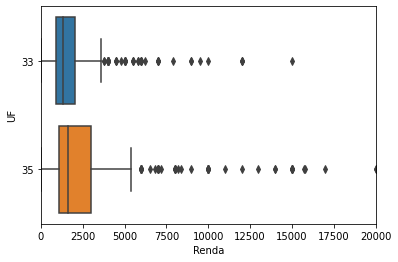

In [114]:
import seaborn as sns

state_income = rj_income.append(sp_income)
                           
ax = sns.boxplot(x = 'Renda', y = 'UF', data = state_income, orient = 'h')
ax.set(xlim=(0, 20000))

Looking at the boxplot, the monthly income for São Paulo seems to be slightly higher. We can also see this by taking the mean:

In [116]:
rj_mean = rj_income['Renda'].mean( )
rj_mean

2240.518

In [117]:
sp_mean = sp_income['Renda'].mean( )
sp_mean

2839.352

To test it, let's use a Hypothesis test. So, let's follow each phase:

**1. Formulation of the hypothesis**

We will test the hypothesis that the monthly income for Rio workers is lower than the monthly income for São Paulo workers. Thus, our hypothesis are:

\begin{equation}
H_0 : \mu_1 - \mu_2 \geq 0
\end{equation}

\begin{equation}
H_1 : \mu_1 - \mu_2 < 0
\end{equation}

where, here, index $1$ is related to Rio and $2$ is related to São Paulo.

**2. Choosing an adequate sampling distribution**

Since we have a high number of data points (500 for each sample), we will use a Normal distribution.

**3. Choosing the test significance**

The test significance will be 5%.

In [130]:
significance = 0.05



**4. Evaluate the test statistics**

We can evaluate the test statistics by:

In [136]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

test_rj = DescrStatsW(rj_income['Renda'])
test_sp = DescrStatsW(sp_income['Renda'])

D_0 = 0

In [137]:
test = CompareMeans(test_rj, test_sp)

In [138]:
test.ztest_ind(alternative = "smaller", value = D_0)

(-2.255318273608558, 0.012056679215693396)

So, we have a $z = -2.255$. Considering our significance level:

In [140]:
z_alpha = norm.ppf(significance)
z_alpha

-1.6448536269514729



**5. Accept or reject the null hypothesis**

Thus, since $|z|$ is higher than $z_\alpha$, we reject the null hypothesis. We also come to the same conclusion by analyzing the p-value, which is lower than the test significance ($p = 0.012$).